# **Tugas Praktikum Mandiri**

# 1) Membaca data File CSV

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path = "/content/gdrive/MyDrive/PRAKTIKUM ML/Praktikum03"

In [34]:
import pandas as pd

## buat data frame
df = pd.read_csv(path + '/data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# 2) Melihat Informasi umum pada data

In [35]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# 3) Data Pra_Processing

In [36]:
df1 = (df[["instant", "dteday", "season", "yr", "mnth", "holiday", "weekday", "workingday",
           "weathersit", "temp", "atemp", "hum", "windspeed","registered", "cnt"]]
       .rename(columns={
           "instant": "instan",
           "dteday": "tanggal",
           "season": "musim",
           "yr": "tahun",
           "mnth": "bulan",
           "holiday": "libur",
           "weekday": "hari_dlm_minggu",
           "workingday": "hari_kerja",
           "weathersit": "cuaca",
           "temp": "suhu_normal",
           "atemp": "suhu_terasa",
           "hum": "kelembapan",
           "windspeed": "kecepatan_angin",
           "registered": "terdaftar",
           "cnt": "cnt"
       }).copy())

# Menampilkan 5 data teratas
df1.head()

,instan,tanggal,musim,tahun,bulan,libur,hari_dlm_minggu,hari_kerja,cuaca,suhu_normal,suhu_terasa,kelembapan,kecepatan_angin,terdaftar,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1518,1600


# 4) Analisis Korelasi

In [43]:
# Hitung  matriks korelasi
corr_matrix = df1.drop('tanggal', axis=1).corr()

print(corr_matrix)

                   instan     musim     tahun     bulan     libur  \
instan           1.000000  0.412224  0.866025  0.496702  0.016145   
musim            0.412224  1.000000 -0.001844  0.831440 -0.010537   
tahun            0.866025 -0.001844  1.000000 -0.001792  0.007954   
bulan            0.496702  0.831440 -0.001792  1.000000  0.019191   
libur            0.016145 -0.010537  0.007954  0.019191  1.000000   
hari_dlm_minggu -0.000016 -0.003080 -0.005461  0.009509 -0.101960   
hari_kerja      -0.004337  0.012485 -0.002013 -0.005901 -0.253023   
cuaca           -0.021477  0.019211 -0.048727  0.043528 -0.034627   
suhu_normal      0.150580  0.334315  0.047604  0.220205 -0.028556   
suhu_terasa      0.152638  0.342876  0.046106  0.227459 -0.032507   
kelembapan       0.016375  0.205445 -0.110651  0.222204 -0.015937   
kecepatan_angin -0.112620 -0.229046 -0.011817 -0.207502  0.006292   
terdaftar        0.659623  0.411623  0.594248  0.293488 -0.108745   
cnt              0.628830  0.40610



*    Buat Heatmap Grafik


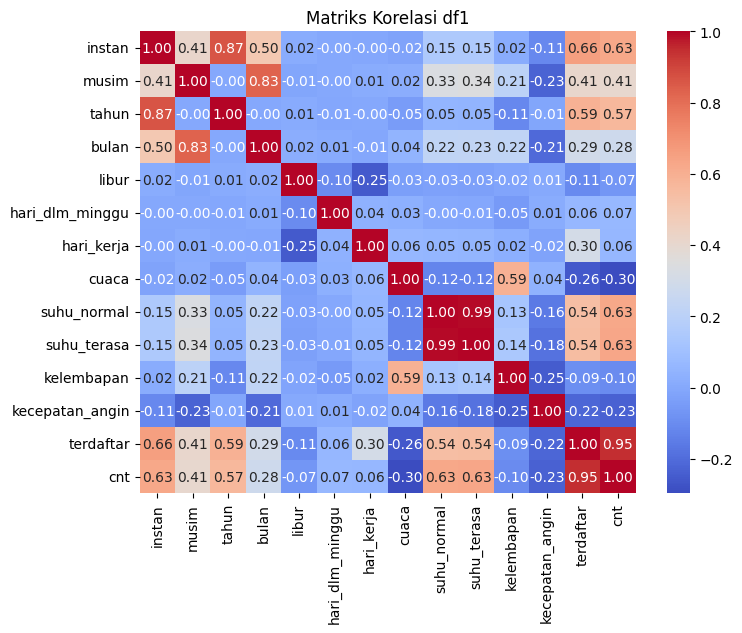

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show()

# 5) Membagi Dataset untuk Training dan Testing

In [37]:
from sklearn.model_selection import train_test_split

# Variabel dependent/terikat/fitur : cnt
y = df1[['cnt']]
# Variabel independent/bebas/fitur : kolom2 yang ada di dataset
X = df1[['instan', 'tanggal', 'musim', 'tahun', 'bulan', 'libur', 'hari_dlm_minggu', 'hari_kerja', 'cuaca', 'suhu_normal', 'suhu_terasa', 'kelembapan', 'kecepatan_angin', 'terdaftar']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

print('Jumlah data training' , len(X_train))
print('Jumlah data testing' , len(X_test))

Jumlah data training 584
Jumlah data testing 147


# 6) Pemodelan



*  Cek Data Training Apakah telah Memiliki Nilai Konstan atau Tidak



In [38]:
import statsmodels.api as sm

## Tambahkan Konstanta
X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,instan,tanggal,musim,tahun,bulan,libur,hari_dlm_minggu,hari_kerja,cuaca,suhu_normal,suhu_terasa,kelembapan,kecepatan_angin,terdaftar
548,1.0,549,2012-07-02,3,1,7,0,1,1,1,0.781667,0.702038,0.447083,0.195267,5323
115,1.0,116,2011-04-26,2,0,4,0,2,1,1,0.631667,0.594083,0.729167,0.326500,3722
272,1.0,273,2011-09-30,4,0,9,0,5,1,1,0.564167,0.544829,0.647500,0.206475,4372
65,1.0,66,2011-03-07,1,0,3,0,1,1,1,0.261739,0.238461,0.551304,0.341352,1628
232,1.0,233,2011-08-21,3,0,8,0,0,0,1,0.710833,0.675525,0.770000,0.248754,2624




*   Pemodelan dengan Pustaka Program OLS





In [39]:
import statsmodels.api as sm

# Drop the 'tanggal' column from X_train_const
X_train_const = X_train_const.drop('tanggal', axis=1)

#Buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('-----------------------------')
print(model.params)
print('-----------------------------')

# Mengambil parameter model
params = model.params
const = params['const']
x1_musim = params['instan']
x3_bulan = params['musim']
x4_bulan = params['tahun']
x5_bulan = params['bulan']
x6_bulan = params['libur']
x7_bulan = params['hari_dlm_minggu']
x8_bulan = params['hari_kerja']
x9_bulan = params['cuaca']
x10_bulan = params['suhu_normal']
x11_bulan = params['suhu_terasa']
x12_bulan = params['kelembapan']
x13_bulan = params['kecepatan_angin']
x14_bulan = params['terdaftar']

# cetak persamaan regresi
print(f"y = {const:.3f} + {x1_musim:.3f}*instan + {x3_bulan:.3f}*musim + {x4_bulan:.3f}*tahun + {x5_bulan:.3f}*bulan + {x6_bulan:.3f}*libur + {x7_bulan:.3f}*hari_dlm_minggu + {x8_bulan:.3f}*hari_kerja + {x9_bulan:.3f}*cuaca + {x10_bulan:.3f}*suhu_normal + {x11_bulan:.3f}*suhu_terasa + {x12_bulan:.3f}*kelembapan + {x13_bulan:.3f}*kecepatan_angin + {x14_bulan:.3f}*terdaftar")

-----------------------------
const               567.447209
instan               -1.420009
musim                 5.487041
tahun               526.311076
bulan                30.683102
libur              -225.909111
hari_dlm_minggu       6.356210
hari_kerja         -938.500462
cuaca               -57.298191
suhu_normal        1479.784653
suhu_terasa         104.270065
kelembapan         -292.358903
kecepatan_angin    -510.492238
terdaftar             1.143128
dtype: float64
-----------------------------
y = 567.447 + -1.420*instan + 5.487*musim + 526.311*tahun + 30.683*bulan + -225.909*libur + 6.356*hari_dlm_minggu + -938.500*hari_kerja + -57.298*cuaca + 1479.785*suhu_normal + 104.270*suhu_terasa + -292.359*kelembapan + -510.492*kecepatan_angin + 1.143*terdaftar




*   Cetak Informasi Model Regresi OLS



In [40]:
# Tampilan Ringkasan Hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1300.
Date:                Thu, 09 Oct 2025   Prob (F-statistic):               0.00
Time:                        09:49:27   Log-Likelihood:                -4250.6
No. Observations:                 584   AIC:                             8529.
Df Residuals:                     570   BIC:                             8590.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             567.4472    113.542     

# 7) Evaluasi Model

In [41]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm

# Tambahkan konstanta pada data testing
X_test_const = sm.add_constant(X_test)

# Drop the 'tanggal' column from X_test_const
X_test_const = X_test_const.drop('tanggal', axis=1)

# Prediksi dengan data testing
y_pred = model.predict(X_test_const)

# Hitung metrik evaluasi
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Buat dictionary hasil evaluasi
evaluation_results = {
    'No': ['1'],
    'Koefisien instan': [model.params.get('instan', np.nan)],
    'Koefisien tanggal': [model.params.get('tanggal', np.nan)],
    'Koefisien musim': [model.params.get('musim', np.nan)],
    'Koefisien tahun': [model.params.get('tahun', np.nan)],
    'Koefisien bulan': [model.params.get('bulan', np.nan)],
    'Koefisien suhu_normal': [model.params.get('suhu_normal', np.nan)],
    'Koefisien suhu_terasa': [model.params.get('suhu_terasa', np.nan)],
    'Koefisien kelembapan': [model.params.get('kelembapan', np.nan)],
    'Koefisien kecepatan_angin': [model.params.get('kecepatan_angin', np.nan)],
    'Koefisien terdaftar': [model.params.get('terdaftar', np.nan)],
    'Intersep': [model.params.get('const', np.nan)],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse],
    'R-Square': [r2]
}

# Tampilkan hasil evaluasi dalam bentuk tabel
df_resume = pd.DataFrame(evaluation_results)

display(df_resume)

,No,Koefisien instan,Koefisien tanggal,Koefisien musim,Koefisien tahun,Koefisien bulan,Koefisien suhu_normal,Koefisien suhu_terasa,Koefisien kelembapan,Koefisien kecepatan_angin,Koefisien terdaftar,Intersep,MAE,MSE,RMSE,R-Square
0,1,-1.420009,NaN,5.487041,526.311076,30.683102,1479.784653,104.270065,-292.358903,-510.492238,1.143128,567.447209,304.004741,183847.182715,428.774046,0.949247
